In [3]:
!pip install scikit-plot

In [80]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import defaultdict
from time import time

import pickle

%matplotlib inline
np.random.seed(100)

In [81]:
# importing models


# for splitting the data set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

#import KNeighbors classifier

from sklearn.neighbors import KNeighborsClassifier

#importing confusion matrix

from sklearn.metrics import confusion_matrix

#Classification report, recall_score,precision_score,f1_score
from sklearn.metrics import classification_report, recall_score, precision_score,f1_score

#roc curve and auc
from sklearn.metrics import roc_curve, roc_auc_score,auc

#importing scikitplot
import scikitplot as skplt

#importing normalizer for rescaling the data
from sklearn.preprocessing import MinMaxScaler



In [82]:
#load the data_set into the dataframe
pima_df=pd.read_csv("motor.csv",index_col=0)


In [83]:
pima_df.head()

,Current,Temp,Status
Power,,,
2710.02,12.32,33,Overcurrent-fault
2651.04,12.05,33,Overcurrent-fault
2627.02,11.40,31,Running-smoothly
2639.47,12.00,33,Overcurrent-fault
2658.42,11.20,30,Running-smoothly


In [84]:
pima_df.shape

(440, 3)

In [85]:
pima_df.dtypes

Current    float64
Temp         int64
Status      object
dtype: object

In [86]:

df= pd.read_csv("motor.csv", delimiter=',', header=None, skiprows=1, names=['Power','Current','Temp','Status'])

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)
train_features = train[['Power','Current','Temp','Status']]

In [87]:
#Convert the dataframe to Input and output data variables
X = pima_df.loc[:,'Current':'Temp']
print(X.head())
Y = pima_df['Temp']


         Current  Temp
Power                 
2710.02    12.32    33
2651.04    12.05    33
2627.02    11.40    31
2639.47    12.00    33
2658.42    11.20    30


In [ ]:
#Splitting the data set into train and test dataset with test_data size is 20 percent and 80 percent is 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1,stratify=Y)

In [10]:
# Pickling X_train
with open('C:\Users\Syed Issam Bukhari\Desktop\motor\Pickles\X_train.pickle','wb') as output:
    pickle.dump(X_train, output)

with open('C:\Users\Syed Issam Bukhari\Desktop\motor\\Pickles\X_test.pickle','wb') as output:
    pickle.dump(X_test, output)
    

with open('C:\Users\Syed Issam Bukhari\Desktop\motor\\Pickles\Y_train.pickle','wb') as output:
    pickle.dump(Y_train, output)

with open('C:\Users\Syed Issam Bukhari\Desktop\motor\\Pickles\Y_test.pickle','wb') as output:
    pickle.dump(Y_test, output)



## Implementing knn classifier on data

### Choosing the value of k is very important, for that i am splitting my data into train test and validation 

In [11]:
#Splitting the data set into train and validation dataset with test_data size is 20 percent and 80 percent is 
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=1,stratify=Y_train)

In [12]:
# It is accepted that the optimum value of k is squareroot(all train samples)/2

In [13]:
k_op=math.sqrt(X_train.size)/2 
print(k_op)

28.42534080710379


In [14]:
k_op=27

In [15]:
plt.style.available
plt.style.use('seaborn-dark')


### low k values captures noise and high k value is hard to compute. We need to find the moderate k value

In [16]:
k_list=[]
acc_list=[]
for i in range(1,k_op):
    # setting the value of k=1
    knn=KNeighborsClassifier(n_neighbors=i)
    #Fitting the data into the model
    knn.fit(X_train,Y_train)
    #seeing how the model performs with the validation data
    acc=knn.score(X_val,Y_val)*100
    k_list.append(i)
    acc_list.append(acc)
    #k_acc[i]=acc
    print("k={} : acc={}".format(i,acc))

k=1 : acc=63.725490196078425
k=2 : acc=78.43137254901961
k=3 : acc=71.56862745098039
k=4 : acc=78.43137254901961
k=5 : acc=77.45098039215686
k=6 : acc=75.49019607843137
k=7 : acc=77.45098039215686
k=8 : acc=74.50980392156863
k=9 : acc=73.52941176470588
k=10 : acc=73.52941176470588
k=11 : acc=71.56862745098039
k=12 : acc=75.49019607843137
k=13 : acc=75.49019607843137
k=14 : acc=75.49019607843137
k=15 : acc=75.49019607843137
k=16 : acc=75.49019607843137
k=17 : acc=78.43137254901961
k=18 : acc=77.45098039215686
k=19 : acc=76.47058823529412
k=20 : acc=75.49019607843137
k=21 : acc=73.52941176470588
k=22 : acc=74.50980392156863
k=23 : acc=75.49019607843137
k=24 : acc=73.52941176470588
k=25 : acc=71.56862745098039
k=26 : acc=74.50980392156863


In [17]:
k_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

Text(0, 0.5, 'accuracy')

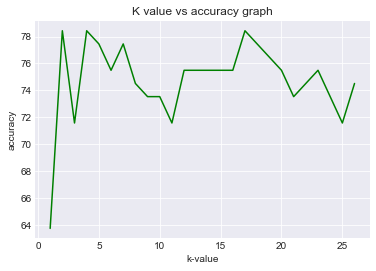

In [18]:
plt.style.use('seaborn-darkgrid')
plt.plot(k_list,acc_list,'green');
plt.title("K value vs accuracy graph")
plt.xlabel('k-value')
plt.ylabel('accuracy')


In [19]:
#From the above graph we can observe that at k=4 and k=17 the accuracy is maximum and after it it keeps dropping

In [20]:
# setting the value of k=20
for k in (4,17):
    knn=KNeighborsClassifier(n_neighbors=k)
    #Fitting the data into the model
    knn.fit(X_train,Y_train)
    #seeing how the model performs with the test data
    Train_acc=knn.score(X_train,Y_train)*100
    Test_acc=knn.score(X_test,Y_test)*100
    print("k= {} Train Accuracy={} and Test Accuracy ={}".format(k,Train_acc,Test_acc))


k= 4 Train Accuracy=82.17821782178217 and Test Accuracy =75.59055118110236
k= 17 Train Accuracy=76.73267326732673 and Test Accuracy =78.74015748031496


In [21]:
# From the above we can see that there is overfitting at k=4 that means it has captured noise.
#k=17 is the optimum value of k

## k= 17 Train Accuracy=76.73267326732673 and Test Accuracy =78.74015748031496

## Calculating the performance metrics

In [22]:
Y_pred=knn.predict(X_test)
#Performance metrics
confusion_matrix(Y_test,Y_pred)

array([[90,  2],
       [25, 10]])

In [23]:
precision_score(Y_test,Y_pred)*100

83.33333333333334

In [24]:
recall_score(Y_test,Y_pred)*100

28.57142857142857

In [25]:
f1_score(Y_test,Y_pred)*100

42.553191489361694

In [26]:
#getting fpr and tpr and threshold
fpr,tpr,threshold=roc_curve(Y_test,Y_pred)

In [27]:
#one way of getting area under curve
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6319875776397514


In [28]:
print("fpr={}, tpr={}, threshold= {}".format(fpr,tpr,threshold))

fpr=[0.         0.02173913 1.        ], tpr=[0.         0.28571429 1.        ], threshold= [2 1 0]


In [29]:
#getting area under curve
roc_auc_score(Y_test,Y_pred)

0.6319875776397514

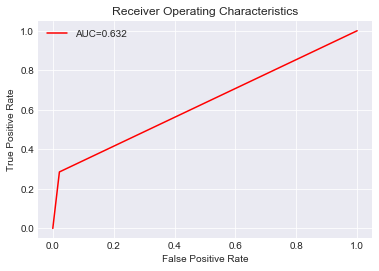

In [30]:
#Plotting the roc curve
plt.plot(fpr,tpr,'r',label = 'AUC = %0.2f' % roc_auc);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title("Receiver Operating Characteristics");
plt.legend(["AUC=%.3f"%roc_auc]);

In [31]:
CR=classification_report(y_true=Y_test,y_pred=Y_pred)

In [32]:
print(CR)

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        92
           1       0.83      0.29      0.43        35

    accuracy                           0.79       127
   macro avg       0.81      0.63      0.65       127
weighted avg       0.80      0.79      0.75       127



## classification report explained
Precision — What percent of your predictions were correct?

It means that- out of all our predictions for patients not having diabetes, 78 percent of them are correct.
             - out of all our predictions for patients having diabetes, 83 percent predictions are right.

Recall — What percent of the positive cases did you catch?
It means that- out of all the patients that did not have diabetes, 98 percent of them are predicted correct.
               - Out of all the patients that had diabetes, only 29 percent of them are covered(that is made correct prediction) and 71 percent of them are wrongly predicted)

F1 score — What percent of positive predictions were correct?

Support-Support is the number of actual occurrences of the class in the specified dataset.

## Our target data set is not balanced. Therefore for evaluating the model, accuracy is not a correct measure.

# Plotting roc and auc curve using scikit-plot

In [33]:
y_proba=knn.predict_proba(X_test)

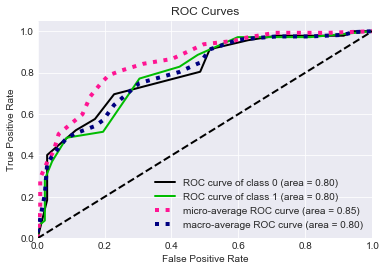

In [34]:
skplt.metrics.plot_roc(y_true=Y_test,y_probas=y_proba)

## Using Cross validation technique to evaluate the model

### k-fold cross validation

In [35]:
X=np.asarray(X)
Y=np.asarray(Y)

## stratified kfold cross validation

In [37]:
sf_cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=7)
knn_kfold_strat=KNeighborsClassifier(n_neighbors=17)

crossvalscore=cross_val_score(estimator=knn_kfold_strat,X=X,y=Y,cv=sf_cv)

In [38]:
score=cross_validate(estimator=knn_kfold_strat,X=X,y=Y,cv=cv,return_train_score=True)

In [39]:
test_acc=score['test_score'].mean()*100
train_acc=score['train_score'].mean()*100
print("The accuracy obtained from cross validation test score is {}".format(test_acc))
print("The accuracy obtained from cross validation train score is {}".format(train_acc))

The accuracy obtained from cross validation test score is 75.66179227596551
The accuracy obtained from cross validation train score is 77.84269242463223


In [51]:
#Making the data frame for model accuracies

df_model=pd.DataFrame({'Model':["KNN"],'Train_Accuracy':[train_acc],'Test_Accuracy':[test_acc]})

In [47]:
df_model['Model']=["KNN"]
df_model['Train_accuracy']=train_acc
df_model['Test_accuracy']=test_acc

,Model,Train_Accuracy,Test_Accuracy
0,KNN,77.842692,75.661792


In [53]:
# Pickling dataframe
with open('C:\Users\Syed Issam Bukhari\Desktop\motor\\Pickles\df_model.pickle','wb') as output:
    pickle.dump(df_model, output)


In [54]:
#pickling knnmodel
with open('C:\Users\Syed Issam Bukhari\Desktop\motor\\Pickles\KNN.pickle','wb') as output:
    pickle.dump(knn_kfold_strat, output)
